# One Gate Pair

In [1]:
means = [-1.0231085456845437,
 -0.9967476277157938,
 -0.9713390671689187,
 -0.9469696120907938,
 -0.9236470027157938]
std_devs = [0.012258911222833775,
 0.022025153027815915,
 0.023800541710132135,
 0.022549492515404793,
 0.015264169281851436]
errs_on_mean = [0.00038766081097954677,
 0.0006964964938165221,
 0.0007526392134985657,
 0.0007130775642959866,
 0.0004826954152102721]

In [2]:
means_cnot = [-1.024509324981419,
 -1.0077516531064188,
 -0.9905175066220439,
 -0.9732611335751687,
 -0.9571140691220437]
std_devs_cnot = [0.012040348411028143,
 0.0183059406758592,
 0.020905871760964746,
 0.01808271043774114,
 0.014820610495330865]
errs_on_mean_cnot = [0.0003807492480083814,
 0.000578884672476372,
 0.000661101712360438,
 0.0005718255125256238,
 0.00046866885479441813]

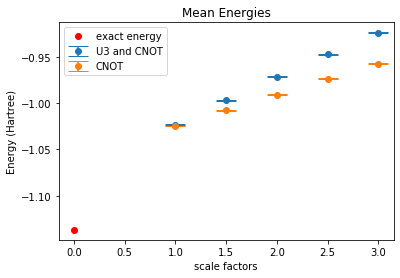

In [17]:
import matplotlib.pyplot as plt

#Plotting means 
f = plt.figure()

scales = [1, 1.5, 2, 2.5, 3]

plt.errorbar(scales, means, yerr=errs_on_mean,capsize = 10, fmt ='o', label = 'U3 and CNOT' )
plt.errorbar(scales, means_cnot, yerr= errs_on_mean_cnot,capsize = 10, fmt ='o', label = 'CNOT' )
plt.plot(0, -1.137, 'ro', label = 'exact energy')

plt.title('Mean Energies')
plt.xlabel('scale factors')
plt.ylabel('Energy (Hartree)')
plt.legend()
plt.show()
f.savefig('resultsAug6', dpi = 1000)

# 2 gate pair

In [8]:
means5 = [-1.0423814870907937,
 -1.0188940242001687,
 -0.9949465378720438,
 -0.9732428230282938,
 -0.9510288738095438,
 -0.9331516238095438,
 -0.9119269734189188,
 -0.8931035339657938,
 -0.8716790671689187]
std_devs5 = [0.01156689862176383,
 0.027064859623805254,
 0.03535505959516701,
 0.03655642629240738,
 0.03892670558512413,
 0.036230456230213426,
 0.032997510270784,
 0.027772019626862068,
 0.017037448300634743]
errs_on_mean5 = [0.0003657774510903618,
 0.0008558660096395252,
 0.0011180251513171833,
 0.0011560157020007182,
 0.0012309705145578972,
 0.001145707623545122,
 0.001043472895704769,
 0.0008782283724378369,
 0.0005387714214737096]

In [9]:
means5_cnot =[-1.0419870710751689,
 -1.0209594538876687,
 -0.9986028484189188,
 -0.9807879324032938,
 -0.9613018484189187,
 -0.9441765456845437,
 -0.9238133835751687,
 -0.9056704148251687,
 -0.8882969695126688]
std_devs5_cnot = [0.0115914591724312,
 0.027656316866571218,
 0.03492895820374601,
 0.037631125255649815,
 0.037450729978802694,
 0.03890645506621247,
 0.03310000037652122,
 0.02766168676365857,
 0.017207324780358094]
errs_on_mean5_cnot = [0.00036655412389733033,
 0.0008745695298969612,
 0.0011045506422066105,
 0.001190000667229395,
 0.0011842960676896597,
 0.0012303301369222858,
 0.0010467139174223801,
 0.0008747393409529286,
 0.0005441433874418816]

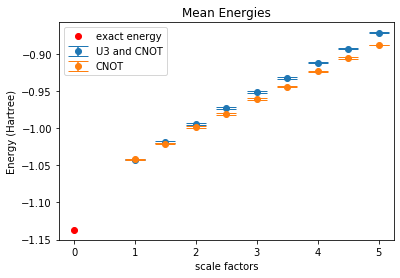

In [19]:
#Plotting means 
f = plt.figure()

scales5 = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

plt.errorbar(scales5, means5, yerr=errs_on_mean5,capsize = 10, fmt ='o', label = 'U3 and CNOT' )
plt.errorbar(scales5, means5_cnot, yerr= errs_on_mean5_cnot,capsize = 10, fmt ='o', label = 'CNOT' )
plt.plot(0, -1.137, 'ro', label = 'exact energy')

plt.title('Mean Energies')
plt.xlabel('scale factors')
plt.ylabel('Energy (Hartree)')
plt.legend()
plt.show()
f.savefig('resultsAug6(2)', dpi = 1000)

# Extrapolation Functions

In [12]:
def RichardsonExtrap_Fraction(energies): 
    """
    Input: An array of energies scaled with different stretch factors--normal integer multiples only --eg 1,2,3,4..
    Assumption: Odd scalings - 1,3,5,7,...
    Output: Zero Error extrapolated answer
    """
    n = len(energies)
    scales = [1+i*0.5 for i in range(n)]
    
    #setting up all equations 
    equations = []
    for eq_num in scales: 
        equation = []
        if eq_num == 1: 
            for i in range(n): 
                equation.append(1)
            equations = [equation]
        else: 
            for term_num in scales: 
                term = term_num**(eq_num*2-2)
                #print(term)
                equation.append(term)
            equations = np.append(equations, [equation], axis = 0)
    #print(equations)
    
    #Now filling up equals to matrix 
    equals_to = [1]
    for i in range(1, n): 
        equals_to.append(0)
    #print(equals_to)
    
    #solving the system
    coeff = np.linalg.solve(equations, equals_to)
    #print(coeff)
    
    #Combine coeff with energies to get zero noise result 
    result = np.dot(coeff, energies)
    return result

In [13]:
def MonteCarloError(means, std_devs, poly_fit = False, deg = 1, sampling_size = 1000): 
    """
    Input: arrays means and standard deviations of the various scalings of noise, whether to do richardson i.e. no poly fit 
    If doing polyfit, then specify degree, sampling_size is how many times to sample from the Gaussian 
    
    Assumption: Scaled by integer values ranging from 1 to X where X>1
    
    Output: Error estimate
    """
    n = len(means)
    
    #Sampling from Gaussian for each scaling 
    all_samples = []
    debug_means = []
    for i in range(n): 
        samples = np.random.normal(means[i], std_devs[i], sampling_size)
        all_samples.append(samples)
        #for debugging
        debug_means.append(means[i] - np.mean(samples))
    #print(debug_means)
    
    #Doing Extrapolation for all sampling_size samples (1000 if set to default)
    zero_noise_energies = []
    for j in range(sampling_size): 
        energies = []
        for i in range(n): 
            energies.append(all_samples[i][j])
            
        ##Doing either richardson or funcs 
        ###Polynomial
        if poly_fit: 
            ####need the scale values: 
            scales = []
            scales = [0.5*c +1 for c in range(n)]
            ####making the function 
            param = np.polyfit(scales, energies, deg, w = [1/i for i in std_devs])
            f = np.poly1d(param)
            ####extrapolation
            result = f(0)
            zero_noise_energies.append(result)
            
        ###Richardson
        else: 
            result = RichardsonExtrap_Fraction(energies)
            zero_noise_energies.append(result)
    
    #Returning error i.e. std 
    error = np.std(zero_noise_energies)
    return error
    
        

In [44]:
import numpy as np

#Richardson Extrap Error(Uncertainity)
R_uncert = MonteCarloError(means, std_devs, poly_fit = False)
R_uncert_cnot = MonteCarloError(means_cnot, std_devs_cnot, poly_fit = False)
R_uncert5 = MonteCarloError(means5, std_devs5, poly_fit = False)
R_uncert5_cnot = MonteCarloError(means5_cnot, std_devs5_cnot, poly_fit = False)

#Polynomial Fits Errors (Uncertainities)
n_degree1 = 4
n_degree2 = 8
poly_uncerts = []
poly_uncerts_cnot = []
poly_uncerts5 = []
poly_uncerts5_cnot = []

for i in range(1, n_degree1+1): 
    uncert = MonteCarloError(means, std_devs, poly_fit = True, deg = i)
    poly_uncerts.append(uncert)
    uncert_cnot = MonteCarloError(means_cnot, std_devs_cnot, poly_fit = True, deg = i)
    poly_uncerts_cnot.append(uncert_cnot)
    
for i in range(1, n_degree2+1): 
    uncert = MonteCarloError(means5, std_devs5, poly_fit = True, deg = i)
    poly_uncerts5.append(uncert)
    uncert5_cnot = MonteCarloError(means5_cnot, std_devs5_cnot, poly_fit = True, deg = i)
    poly_uncerts5_cnot.append(uncert5_cnot)

In [45]:
poly_uncerts5

[0.013434679515554052,
 0.031918972441530434,
 0.09254842541486416,
 0.2578740640868473,
 0.7780276193352097,
 2.8497999051666567,
 11.334967399721243,
 68.53484822971507]

In [46]:
poly_uncerts5_cnot

[0.013667272838448078,
 0.03293658631556617,
 0.09052237305210317,
 0.26884626999321115,
 0.7860621174233197,
 3.0241292915001847,
 12.194766900880994,
 66.77065784063521]

In [20]:
#Richardson 
R_zero = RichardsonExtrap_Fraction(means)
R_zero_cnot = RichardsonExtrap_Fraction(means_cnot)
R_zero5 = RichardsonExtrap_Fraction(means5)
R_zero5_cnot = RichardsonExtrap_Fraction(means5_cnot)

funcs = []
funcs_cnot = []
funcs5 = []
funcs5_cnot = []

for i in range(1,n_degree1+1): 
    param= np.polyfit(scales, means, i, w=[1/j for j in std_devs])
    p = np.poly1d(param)
    funcs.append(p)
    param_cnot = np.polyfit(scales, means_cnot, i, w=[1/j for j in std_devs_cnot])
    p_cnot = np.poly1d(param_cnot)
    funcs_cnot.append(p_cnot)

for i in range(1,n_degree2+1): 
    param= np.polyfit(scales5, means5, i, w=[1/j for j in std_devs5])
    p = np.poly1d(param)
    funcs5.append(p)
    param_cnot = np.polyfit(scales5, means5_cnot, i, w=[1/j for j in std_devs5_cnot])
    p_cnot = np.poly1d(param_cnot)
    funcs5_cnot.append(p_cnot)


##Finding zero_noise
poly_zero = []
poly_zero_cnot = []
poly_zero5 = []
poly_zero5_cnot = []
for f in range(len(funcs)):
    poly_zero.append(funcs[f](0))
    poly_zero_cnot.append(funcs_cnot[f](0))
for f in range(len(funcs5)):
    poly_zero5.append(funcs5[f](0))
    poly_zero5_cnot.append(funcs5_cnot[f](0))

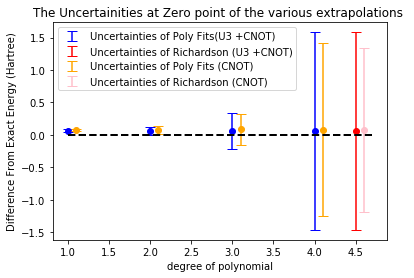

In [53]:
exact_energy = [-1.137]

d = plt.figure()
import matplotlib.pyplot as plt 
degrees = []
for i in range(n_degree1): 
    degrees.append(i+1)
plt.errorbar(degrees, [energy - exact_energy[0] for energy in poly_zero], yerr=poly_uncerts, capsize = 5,fmt =' ', ecolor = 'blue', label = 'Uncertainties of Poly Fits(U3 +CNOT)' )
plt.errorbar(n_degree1+.5, R_zero- exact_energy[0], yerr=R_uncert, capsize = 5,fmt =' ', ecolor = 'red' , label = 'Uncertainties of Richardson (U3 +CNOT)')
plt.plot(degrees, [energy - exact_energy[0] for energy in poly_zero], linestyle = ' ', marker = 'o', color = 'blue' )
plt.plot(n_degree1+.5, R_zero- exact_energy[0],  linestyle = ' ', marker = 'o', color = 'red' )

plt.errorbar([i+0.1 for i in degrees], [energy - exact_energy[0] for energy in poly_zero_cnot], yerr=poly_uncerts_cnot, capsize = 5,fmt =' ', ecolor = 'orange', label = 'Uncertainties of Poly Fits (CNOT)' )
plt.errorbar(n_degree1+.6, R_zero_cnot- exact_energy[0], yerr=R_uncert_cnot, capsize = 5,fmt =' ', ecolor = 'pink' , label = 'Uncertainties of Richardson (CNOT)')
plt.plot([i+0.1 for i in degrees], [energy - exact_energy[0] for energy in poly_zero_cnot], linestyle = ' ', marker = 'o', color = 'orange' )
plt.plot(n_degree1+.6, R_zero_cnot- exact_energy[0],  linestyle = ' ', marker = 'o', color = 'pink' )


plt.xlabel('degree of polynomial')
plt.ylabel('Difference From Exact Energy (Hartree)')
plt.title('The Uncertainities at Zero point of the various extrapolations ')
plt.plot(degrees + [4.7], [0*i for i in range(len(degrees + [4.7]))], linestyle = '--', color = 'black' , linewidth = 2)
plt.legend()
plt.show()
d.savefig('August6(3)', dpi = 1000)

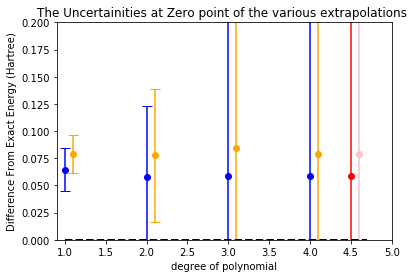

In [54]:
exact_energy = [-1.137]

d = plt.figure()

import matplotlib.pyplot as plt 
degrees = []
for i in range(n_degree1): 
    degrees.append(i+1)
plt.errorbar(degrees, [energy - exact_energy[0] for energy in poly_zero], yerr=poly_uncerts, capsize = 5,fmt =' ', ecolor = 'blue', label = 'Uncertainties of Poly Fits(U3 +CNOT)' )
plt.errorbar(n_degree1+.5, R_zero- exact_energy[0], yerr=R_uncert, capsize = 5,fmt =' ', ecolor = 'red' , label = 'Uncertainties of Richardson (U3 +CNOT)')
plt.plot(degrees, [energy - exact_energy[0] for energy in poly_zero], linestyle = ' ', marker = 'o', color = 'blue' )
plt.plot(n_degree1+.5, R_zero- exact_energy[0],  linestyle = ' ', marker = 'o', color = 'red' )

plt.errorbar([i+0.1 for i in degrees], [energy - exact_energy[0] for energy in poly_zero_cnot], yerr=poly_uncerts_cnot, capsize = 5,fmt =' ', ecolor = 'orange', label = 'Uncertainties of Poly Fits (CNOT)' )
plt.errorbar(n_degree1+.6, R_zero_cnot- exact_energy[0], yerr=R_uncert_cnot, capsize = 5,fmt =' ', ecolor = 'pink' , label = 'Uncertainties of Richardson (CNOT)')
plt.plot([i+0.1 for i in degrees], [energy - exact_energy[0] for energy in poly_zero_cnot], linestyle = ' ', marker = 'o', color = 'orange' )
plt.plot(n_degree1+.6, R_zero_cnot- exact_energy[0],  linestyle = ' ', marker = 'o', color = 'pink' )


plt.axis([0.9, 5, 0, 0.2])

plt.xlabel('degree of polynomial')
plt.ylabel('Difference From Exact Energy (Hartree)')
plt.title('The Uncertainities at Zero point of the various extrapolations ')
plt.plot(degrees + [4.7], [0*i for i in range(len(degrees + [4.7]))], linestyle = '--', color = 'black' , linewidth = 2)
#plt.legend()
plt.show()
d.savefig('August6(4)', dpi = 1000)

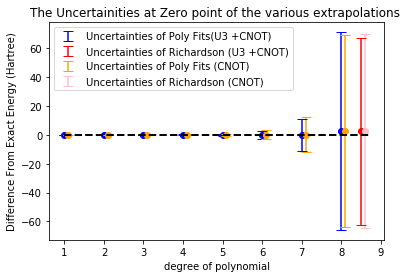

In [55]:
g = plt.figure()

import matplotlib.pyplot as plt 
degrees = []
for i in range(n_degree2): 
    degrees.append(i+1)
plt.errorbar(degrees, [energy - exact_energy[0] for energy in poly_zero5], yerr=poly_uncerts5, capsize = 5,fmt =' ', ecolor = 'blue', label = 'Uncertainties of Poly Fits(U3 +CNOT)' )
plt.errorbar(n_degree2+.5, R_zero5- exact_energy[0], yerr=R_uncert5, capsize = 5,fmt =' ', ecolor = 'red' , label = 'Uncertainties of Richardson (U3 +CNOT)')
plt.plot(degrees, [energy - exact_energy[0] for energy in poly_zero5], linestyle = ' ', marker = 'o', color = 'blue' )
plt.plot(n_degree2+.5, R_zero5- exact_energy[0],  linestyle = ' ', marker = 'o', color = 'red' )

plt.errorbar([i+0.1 for i in degrees], [energy - exact_energy[0] for energy in poly_zero5_cnot], yerr=poly_uncerts5_cnot, capsize = 5,fmt =' ', ecolor = 'orange', label = 'Uncertainties of Poly Fits (CNOT)' )
plt.errorbar(n_degree2+.6, R_zero5_cnot- exact_energy[0], yerr=R_uncert5_cnot, capsize = 5,fmt =' ', ecolor = 'pink' , label = 'Uncertainties of Richardson (CNOT)')
plt.plot([i+0.1 for i in degrees], [energy - exact_energy[0] for energy in poly_zero5_cnot], linestyle = ' ', marker = 'o', color = 'orange' )
plt.plot(n_degree2+.6, R_zero5_cnot- exact_energy[0],  linestyle = ' ', marker = 'o', color = 'pink' )


#plt.axis([0.9, 5, 0, 0.2])

plt.xlabel('degree of polynomial')
plt.ylabel('Difference From Exact Energy (Hartree)')
plt.title('The Uncertainities at Zero point of the various extrapolations ')
plt.plot(degrees + [8.7], [0*i for i in range(len(degrees + [8.7]))], linestyle = '--', color = 'black' , linewidth = 2)
plt.legend()
plt.show()
g.savefig('August(5)', dpi = 1000)

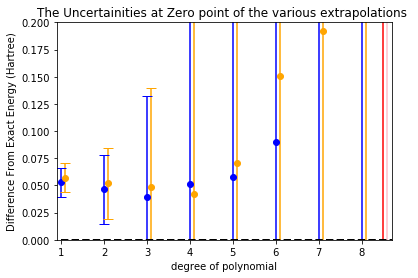

In [56]:
h = plt.figure()

import matplotlib.pyplot as plt 
degrees = []
for i in range(n_degree2): 
    degrees.append(i+1)
plt.errorbar(degrees, [energy - exact_energy[0] for energy in poly_zero5], yerr=poly_uncerts5, capsize = 5,fmt =' ', ecolor = 'blue', label = 'Uncertainties of Poly Fits(U3 +CNOT)' )
plt.errorbar(n_degree2+.5, R_zero5- exact_energy[0], yerr=R_uncert5, capsize = 5,fmt =' ', ecolor = 'red' , label = 'Uncertainties of Richardson (U3 +CNOT)')
plt.plot(degrees, [energy - exact_energy[0] for energy in poly_zero5], linestyle = ' ', marker = 'o', color = 'blue' )
plt.plot(n_degree2+.5, R_zero5- exact_energy[0],  linestyle = ' ', marker = 'o', color = 'red' )

plt.errorbar([i+0.1 for i in degrees], [energy - exact_energy[0] for energy in poly_zero5_cnot], yerr=poly_uncerts5_cnot, capsize = 5,fmt =' ', ecolor = 'orange', label = 'Uncertainties of Poly Fits (CNOT)' )
plt.errorbar(n_degree2+.6, R_zero5_cnot- exact_energy[0], yerr=R_uncert5_cnot, capsize = 5,fmt =' ', ecolor = 'pink' , label = 'Uncertainties of Richardson (CNOT)')
plt.plot([i+0.1 for i in degrees], [energy - exact_energy[0] for energy in poly_zero5_cnot], linestyle = ' ', marker = 'o', color = 'orange' )
plt.plot(n_degree2+.6, R_zero5_cnot- exact_energy[0],  linestyle = ' ', marker = 'o', color = 'pink' )


plt.axis([0.9, 8.7, 0, 0.2])

plt.xlabel('degree of polynomial')
plt.ylabel('Difference From Exact Energy (Hartree)')
plt.title('The Uncertainities at Zero point of the various extrapolations ')
plt.plot(degrees + [8.7], [0*i for i in range(len(degrees + [8.7]))], linestyle = '--', color = 'black' , linewidth = 2)
#plt.legend()
plt.show()
h.savefig('August6(6)', dpi = 1000)

In [57]:
poly_zero

[-1.0724786563135156,
 -1.0789381728390606,
 -1.07855466762526,
 -1.07794542263766]

In [58]:
poly_zero_cnot

[-1.0583016932715783,
 -1.0593844314588816,
 -1.0529303844737512,
 -1.0581646882626758]